MNIST 데이터셋을 분류한다

Logistic, SGD 사용
score로 과대적합 과소적합 확인하고 -> 성능 리포트 뽑기 -> predict

분류하고 확인을 위한 데이터를 그림판으로 그려서 predict에 넣어본다

In [1]:
import numpy as np

In [2]:
import pandas as pd
from sklearn.datasets import fetch_openml

mnist = fetch_openml("mnist_784", as_frame = False)
# MNIST 데이터는 이미지라서 데이터 프레임으로 할 필요 X

C:\Users\kdp\anaconda3\envs\EXAM_ML\lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
type(mnist)

sklearn.utils._bunch.Bunch

bunch 객체의 속성
- DESCR : 데이터셋 설명
- data : 입력 데이터, 일반적으로 2D numpy 배열
- target : 레이블, 일반적으로 1D numpy 배열

In [4]:
X = mnist.data
X # 이미지들이 우르르르 들어가 있는 것

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [5]:
y = mnist.target
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [6]:
'''
import cv2
cv2.imshow("test_image", X[0].reshape(28, 28))
cv2.waitKey(0)
cv2.destroyAllWindows()
'''

'\nimport cv2\ncv2.imshow("test_image", X[0].reshape(28, 28))\ncv2.waitKey(0)\ncv2.destroyAllWindows()\n'

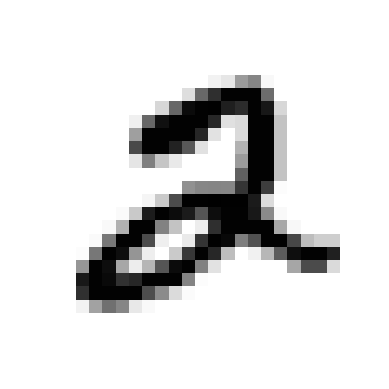

In [7]:
import matplotlib.pyplot as plt

def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")

some_digit = X[5]
plot_digit(some_digit)
plt.show()

In [8]:
y[5]

'2'

In [29]:
# 내가 그린 데이터도 확인하기 
import cv2
my_num = cv2.imread("../data/my_num.png", cv2.IMREAD_GRAYSCALE)
cv2.imshow("my_num", my_num)
cv2.waitKey(0)
cv2.destroyAllWindows()
my_num = cv2.resize(my_num, (28, 28))

my_num = my_num.ravel()
my_num = abs(my_num.astype("int") - 255) # 이미지는 흰부분이 255라서 

In [10]:
# MNIST 데이터는 이미 train과 test를 일정 구간으로 나누어 둔 데이터
X_train = X[:60000]
X_test = X[60000:]
y_train = y[:60000]
y_test = y[60000:]

# SGDClassifier : partial_fit으로 하기

In [11]:
from sklearn.linear_model import SGDClassifier 
# 확률적 경사하강법, 
# -한 번에 하나씩 훈련 샘플 독립적 처리 가능
# -온라인 학습에 적합

In [12]:
list(set(y_train))

['1', '9', '6', '8', '3', '0', '4', '2', '5', '7']

In [13]:
sgd_model = SGDClassifier(loss = "log_loss")

In [14]:
train_score_list = []
test_score_list = []
for n in range(1, 60):
    sgd_model.partial_fit(X_train, y_train, classes=list(set(y_train)))
    train_score = sgd_model.score(X_train, y_train)
    test_score = sgd_model.score(X_test, y_test)
    train_score_list.append(train_score)
    test_score_list.append(test_score)
    # print(f"[{n}번 학습] [기본 SGD] 학습 점수 : {train_score2}, 테스트 점수 : {test_score2}")
    if train_score > 0.89 and  test_score > 0.89:
        break

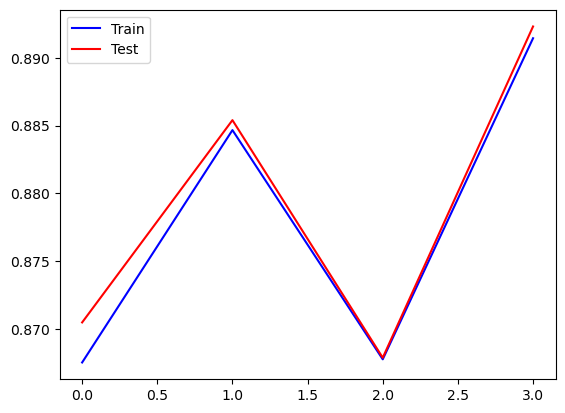

In [15]:
# 시각화 
import matplotlib.pyplot as plt
plt.plot(train_score_list, "b-", label = "Train")
plt.plot(test_score_list,"r-", label = "Test")
plt.legend()
plt.show()

In [16]:
print(f"train_score : {train_score}, test_score : {test_score}")

train_score : 0.8914333333333333, test_score : 0.8923


In [17]:
sgd_pred = sgd_model.predict(X_test) # 학습 시킬 때 2차원이었으니까 []감싸주기

In [18]:
from sklearn.metrics import accuracy_score, classification_report, f1_score, recall_score, precision_score
print(classification_report(y_test, sgd_pred))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       980
           1       0.98      0.95      0.97      1135
           2       0.89      0.89      0.89      1032
           3       0.81      0.91      0.86      1010
           4       0.92      0.90      0.91       982
           5       0.90      0.74      0.82       892
           6       0.93      0.93      0.93       958
           7       0.93      0.89      0.91      1028
           8       0.73      0.88      0.80       974
           9       0.90      0.85      0.87      1009

    accuracy                           0.89     10000
   macro avg       0.90      0.89      0.89     10000
weighted avg       0.90      0.89      0.89     10000



In [30]:
sgd_model.predict([my_num])

array(['2'], dtype='<U1')

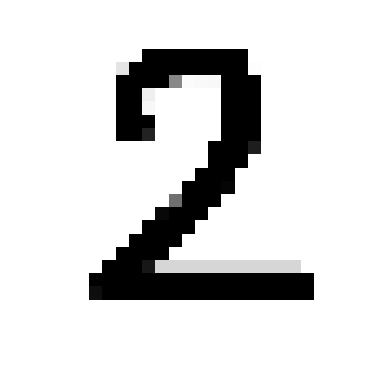

In [31]:
plot_digit(my_num)
plt.show()

# LogisticRegression

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
LR_model = LogisticRegression(random_state=42, max_iter=3000)
LR_model.fit(X_train, y_train)

C:\Users\kdp\anaconda3\envs\EXAM_ML\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=3000, random_state=42)

In [26]:
LR_train_score = LR_model.score(X_train, y_train)
LR_test_score = LR_model.score(X_test, y_test)

In [27]:
print(f"train_score : {LR_train_score}, test_score : {LR_test_score}")

train_score : 0.94305, test_score : 0.919


In [32]:
LR_model.predict([my_num])

array(['2'], dtype=object)